In [284]:
import pandas as pd
import FinanceDataReader as fdr

In [285]:
# 기업별 주가 데이터 불러오기

# jyp 2024 데이터 가져오기
jyp = fdr.DataReader('035900', '2001')
jyp_2024 = jyp[jyp.index.year == 2024]

# yg 2024 데이터 가져오기
yg = fdr.DataReader('122870','2011')
yg_2024 = yg[yg.index.year == 2024]

# sm 2024 데이터 가져오기
sm = fdr.DataReader('041510','2001')
sm_2024 = sm[sm.index.year == 2024]

# hybe 2024 데이터 가져오기
hybe = fdr.DataReader('352820','2020')
hybe_2024 = hybe[hybe.index.year == 2024]


In [286]:
# 각 기획사별 5개 그룹 감성지수 불러오기                          

In [287]:
# HYBE

hybe_2024.rename(columns={
    'Open': 'hybe_open',
    'High': 'hybe_high',
    'Low': 'hybe_low',
    'Close': 'hybe_close',
    'Volume': 'hybe_volume',
    'Change': 'hybe_change'
}, inplace=True)

le_sserafim = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_hybe_르세라핌.csv")
bts = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_hybe_방탄소년단.csv")
seventeen = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_hybe_세븐틴.csv")
tws = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_hybe_투어스.csv")
ilit = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_hybe_아일릿.csv")

# 5개 그룹 인덱스 세팅

le_sserafim.set_index(['0'],inplace=True)
le_sserafim.index.name ='Date'
le_sserafim.index = pd.to_datetime(le_sserafim.index.astype(str), format='%Y%m%d')

bts.set_index(['0'],inplace=True)
bts.index.name ='Date'
bts.index = pd.to_datetime(bts.index.astype(str), format='%Y%m%d')

seventeen.set_index(['0'],inplace=True)
seventeen.index.name ='Date'
seventeen.index = pd.to_datetime(seventeen.index.astype(str), format='%Y%m%d')

tws.set_index(['0'],inplace=True)
tws.index.name ='Date'
tws.index = pd.to_datetime(tws.index.astype(str), format='%Y%m%d')

ilit.set_index(['0'],inplace=True)
ilit.index.name ='Date'
ilit.index = pd.to_datetime(ilit.index.astype(str), format='%Y%m%d')

# 2024년 전체 날짜 데이터 생성
dates = pd.date_range(start='2024-01-01', end='2024-12-30', freq='D')
data = pd.DataFrame(index=dates)

# HYBE 감성분석 점수 평균
hybe_artists = pd.concat([
    data, 
    le_sserafim[['score']], 
    bts[['score']], 
    seventeen[['score']], 
    tws[['score']], 
    ilit[['score']]
], axis=1)

hybe_artists.columns = list(data.columns) + hybe_artist_name
 
hybe_artists['hybe_sentiment_average'] = hybe_artists.select_dtypes(include='number').mean(axis=1)

# HYBE 감성분석 점수 + 종가 데이터 병합 (최종 파일)
hybe_final = pd.concat([data,hybe_artists['hybe_sentiment_average'],hybe_2024],axis=1)
hybe_final

C:\Users\user\AppData\Local\Temp\ipykernel_20888\835233639.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hybe_2024.rename(columns={


,hybe_sentiment_average,hybe_open,hybe_high,hybe_low,hybe_close,hybe_volume,hybe_change
2024-01-01,0.987175,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,0.994331,233000.0,245000.0,232500.0,241500.0,234689.0,0.034261
2024-01-03,0.980753,238000.0,243000.0,236500.0,239500.0,145077.0,-0.008282
2024-01-04,0.997615,238000.0,244500.0,237000.0,240500.0,162942.0,0.004175
2024-01-05,0.994558,242500.0,257000.0,242500.0,252000.0,377790.0,0.047817
...,...,...,...,...,...,...,...
2024-12-26,0.991723,195800.0,200500.0,194900.0,195500.0,117077.0,0.000000
2024-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [288]:
# SM

sm_2024.rename(columns={
    'Open': 'sm_open',
    'High': 'sm_high',
    'Low': 'sm_low',
    'Close': 'sm_close',
    'Volume': 'sm_volume',
    'Change': 'sm_change'
}, inplace=True)


aespa = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_sm_에스파.csv")
riize = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_sm_라이즈.csv")
shinee = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_sm_샤이니.csv")
redvelvet = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_sm_레드벨벳.csv")
exo = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_sm_엑소.csv")

# 5개 그룹 인덱스 세팅

aespa.set_index(['0'],inplace=True)
aespa.index.name ='Date'
aespa.index = pd.to_datetime(aespa.index.astype(str), format='%Y%m%d')

riize.set_index(['0'],inplace=True)
riize.index.name ='Date'
riize.index = pd.to_datetime(riize.index.astype(str), format='%Y%m%d')

shinee.set_index(['0'],inplace=True)
shinee.index.name ='Date'
shinee.index = pd.to_datetime(shinee.index.astype(str), format='%Y%m%d')

redvelvet.set_index(['0'],inplace=True)
redvelvet.index.name ='Date'
redvelvet.index = pd.to_datetime(redvelvet.index.astype(str), format='%Y%m%d')

exo.set_index(['0'],inplace=True)
exo.index.name ='Date'
exo.index = pd.to_datetime(exo.index.astype(str), format='%Y%m%d')

dates = pd.date_range(start='2024-01-01', end='2024-12-30', freq='D')
data = pd.DataFrame(index=dates)

data



# sm 감성분석 점수 평균

# 다른 DataFrame의 인덱스를 data의 인덱스에 맞춤
aespa = aespa.reindex(data.index)
riize = riize.reindex(data.index)
shinee = shinee.reindex(data.index)
redvelvet = redvelvet.reindex(data.index)
exo = exo.reindex(data.index)

# data의 인덱스를 기준으로 병합
sm_artists = pd.concat(
    [data, aespa[['score']], riize[['score']], shinee[['score']], redvelvet[['score']], exo[['score']]],
    axis=1,
    join='outer'  # data의 인덱스를 기준으로 병합
)

sm_artists

sm_artist_name = ['aespa','riize','shinee','redvelvet','exo']

sm_artists.columns = list(data.columns) + sm_artist_name
 
sm_artists['sm_sentiment_average'] = sm_artists.select_dtypes(include='number').mean(axis=1)


# sm 감성분석 점수 + 종가 데이터 병합 (최종 파일)
sm_final = pd.concat([data,sm_artists['sm_sentiment_average'],sm_2024],axis=1)
sm_final

C:\Users\user\AppData\Local\Temp\ipykernel_20888\572631596.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_2024.rename(columns={


,sm_sentiment_average,sm_open,sm_high,sm_low,sm_close,sm_volume,sm_change
2024-01-01,0.988102,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,0.984964,91600.0,94500.0,91200.0,93300.0,155536.0,0.013029
2024-01-03,0.993956,91500.0,93100.0,89900.0,90000.0,181257.0,-0.035370
2024-01-04,0.996054,89700.0,91400.0,88500.0,90000.0,133666.0,0.000000
2024-01-05,0.989907,90500.0,93700.0,90300.0,93700.0,256448.0,0.041111
...,...,...,...,...,...,...,...
2024-12-26,0.987781,76000.0,78900.0,75600.0,77000.0,96194.0,0.015831
2024-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [290]:
# YG

yg_2024.rename(columns={
    'Open': 'yg_open',
    'High': 'yg_high',
    'Low': 'yg_low',
    'Close': 'yg_close',
    'Volume': 'yg_volume',
    'Change': 'yg_change'
}, inplace=True)



BP = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_yg_블랙핑크.csv")
BM = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_yg_베이비몬스터.csv")
BB = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_yg_빅뱅.csv")
TR = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_yg_트레저.csv")
WR = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_yg_위너.csv")

# 5개 그룹 인덱스 세팅

BP.set_index(['0'],inplace=True)
BP.index.name ='Date'
BP.index = pd.to_datetime(BP.index.astype(str), format='%Y%m%d')

BM.set_index(['0'],inplace=True)
BM.index.name ='Date'
BM.index = pd.to_datetime(BM.index.astype(str), format='%Y%m%d')

BB.set_index(['0'],inplace=True)
BB.index.name ='Date'
BB.index = pd.to_datetime(BB.index.astype(str), format='%Y%m%d')

TR.set_index(['0'],inplace=True)
TR.index.name ='Date'
TR.index = pd.to_datetime(TR.index.astype(str), format='%Y%m%d')

WR.set_index(['0'],inplace=True)
WR.index.name ='Date'
WR.index = pd.to_datetime(WR.index.astype(str), format='%Y%m%d')

data = pd.DataFrame(index=dates)

data


# yg 감성분석 점수 평균

# 다른 DataFrame의 인덱스를 data의 인덱스에 맞춤
BP = BP.reindex(data.index)
BM = BM.reindex(data.index)
BB = BB.reindex(data.index)
TR = TR.reindex(data.index)
WR = WR.reindex(data.index)

# data의 인덱스를 기준으로 병합
yg_artists = pd.concat(
    [data, BP[['score']], BM[['score']], BB[['score']], TR[['score']], WR[['score']]],
    axis=1,
    join='outer'  # data의 인덱스를 기준으로 병합
)

yg_artists

yg_artists.columns = list(data.columns) + yg_artist_name
 
yg_artists['yg_sentiment_average'] = yg_artists.select_dtypes(include='number').mean(axis=1)


# yg 감성분석 점수 + 종가 데이터 병합 (최종 파일)
yg_final = pd.concat([data,yg_artists['yg_sentiment_average'],yg_2024],axis=1)
yg_final

C:\Users\user\AppData\Local\Temp\ipykernel_20888\3141275687.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yg_2024.rename(columns={


,yg_sentiment_average,yg_open,yg_high,yg_low,yg_close,yg_volume,yg_change
2024-01-01,0.988285,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,0.985775,48300.0,48800.0,47200.0,47550.0,949594.0,-0.065815
2024-01-03,0.987368,47350.0,47400.0,46450.0,46500.0,405424.0,-0.022082
2024-01-04,0.983905,46200.0,47000.0,46150.0,46300.0,231872.0,-0.004301
2024-01-05,0.980741,46400.0,47050.0,45450.0,45800.0,375407.0,-0.010799
...,...,...,...,...,...,...,...
2024-12-26,0.974003,44850.0,46450.0,44850.0,45750.0,100486.0,0.020067
2024-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [291]:
# JYP

# JYP
jyp_2024.rename(columns={
    'Open': 'jyp_open',
    'High': 'jyp_high',
    'Low': 'jyp_low',
    'Close': 'jyp_close',
    'Volume': 'jyp_volume',
    'Change': 'jyp_change'
}, inplace=True)

two_pm = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_jyp_2pm.csv")
straykids = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_jyp_스트레이키즈.csv")
nmixx = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_jyp_엔믹스.csv")
itzy = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_jyp_있지.csv")
twice = pd.read_csv(r"C:\Users\user\Main_project\news_sentiment_jyp_트와이스.csv")

# 5개 그룹 인덱스 세팅

two_pm.set_index(['0'],inplace=True)
two_pm.index.name ='Date'
two_pm.index = pd.to_datetime(two_pm.index.astype(str), format='%Y%m%d')

straykids.set_index(['0'],inplace=True)
straykids.index.name ='Date'
straykids.index = pd.to_datetime(straykids.index.astype(str), format='%Y%m%d')

nmixx.set_index(['0'],inplace=True)
nmixx.index.name ='Date'
nmixx.index = pd.to_datetime(nmixx.index.astype(str), format='%Y%m%d')

itzy.set_index(['0'],inplace=True)
itzy.index.name ='Date'
itzy.index = pd.to_datetime(itzy.index.astype(str), format='%Y%m%d')

twice.set_index(['0'],inplace=True)
twice.index.name ='Date'
twice.index = pd.to_datetime(twice.index.astype(str), format='%Y%m%d')

dates = pd.date_range(start='2024-01-01', end='2024-12-30', freq='D')
data = pd.DataFrame(index=dates)

data

                         
# jyp 감성분석 점수 평균

# 다른 DataFrame의 인덱스를 data의 인덱스에 맞춤
two_pm = two_pm.reindex(data.index)
straykids = straykids.reindex(data.index)
nmixx = nmixx.reindex(data.index)
itzy = itzy.reindex(data.index)
twice = twice.reindex(data.index)

# data의 인덱스를 기준으로 병합
jyp_artists = pd.concat(
    [data, two_pm[['score']], straykids[['score']], nmixx[['score']], itzy[['score']], twice[['score']]],
    axis=1,
    join='outer'  # data의 인덱스를 기준으로 병합
)

jyp_artists

jyp_artist_name = ['two_pm','straykids','nmixx','itzy','twice']

jyp_artists.columns = list(data.columns) + jyp_artist_name
 
jyp_artists['jyp_sentiment_average'] = jyp_artists.select_dtypes(include='number').mean(axis=1)


# jyp 감성분석 점수 + 종가 데이터 병합 (최종 파일)
jyp_final = pd.concat([data,jyp_artists['jyp_sentiment_average'],jyp_2024],axis=1)
jyp_final

C:\Users\user\AppData\Local\Temp\ipykernel_20888\3540588861.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jyp_2024.rename(columns={


,jyp_sentiment_average,jyp_open,jyp_high,jyp_low,jyp_close,jyp_volume,jyp_change
2024-01-01,0.985923,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,0.994764,100000.0,102400.0,99000.0,101400.0,206572.0,0.000987
2024-01-03,0.979334,100000.0,101000.0,98800.0,100600.0,304238.0,-0.007890
2024-01-04,0.987937,100000.0,104300.0,99900.0,103200.0,383496.0,0.025845
2024-01-05,0.994166,104000.0,106000.0,102200.0,105400.0,442098.0,0.021318
...,...,...,...,...,...,...,...
2024-12-26,0.988148,68900.0,71800.0,68900.0,70400.0,516340.0,0.030747
2024-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [292]:
final_data = pd.DataFrame(index=dates)
final_data = pd.concat([final_data,jyp_final,sm_final,yg_final,hybe_final],axis=1)
final_data = final_data.fillna(method='ffill',axis=0)
final_data = final_data.iloc[:-1,:]
final_data.to_excel('final_data.xlsx')
final_data


# jyp_final
# sm_final
# yg_final
# hybe_final

C:\Users\user\AppData\Local\Temp\ipykernel_20888\4141178023.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  final_data = final_data.fillna(method='ffill',axis=0)


,jyp_sentiment_average,jyp_open,jyp_high,jyp_low,jyp_close,jyp_volume,jyp_change,sm_sentiment_average,sm_open,sm_high,...,yg_close,yg_volume,yg_change,hybe_sentiment_average,hybe_open,hybe_high,hybe_low,hybe_close,hybe_volume,hybe_change
2024-01-01,0.985923,NaN,NaN,NaN,NaN,NaN,NaN,0.988102,NaN,NaN,...,NaN,NaN,NaN,0.987175,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-02,0.994764,100000.0,102400.0,99000.0,101400.0,206572.0,0.000987,0.984964,91600.0,94500.0,...,47550.0,949594.0,-0.065815,0.994331,233000.0,245000.0,232500.0,241500.0,234689.0,0.034261
2024-01-03,0.979334,100000.0,101000.0,98800.0,100600.0,304238.0,-0.007890,0.993956,91500.0,93100.0,...,46500.0,405424.0,-0.022082,0.980753,238000.0,243000.0,236500.0,239500.0,145077.0,-0.008282
2024-01-04,0.987937,100000.0,104300.0,99900.0,103200.0,383496.0,0.025845,0.996054,89700.0,91400.0,...,46300.0,231872.0,-0.004301,0.997615,238000.0,244500.0,237000.0,240500.0,162942.0,0.004175
2024-01-05,0.994166,104000.0,106000.0,102200.0,105400.0,442098.0,0.021318,0.989907,90500.0,93700.0,...,45800.0,375407.0,-0.010799,0.994558,242500.0,257000.0,242500.0,252000.0,377790.0,0.047817
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-12-22,0.997227,72800.0,73000.0,69900.0,70000.0,391834.0,-0.031812,0.985223,77200.0,78500.0,...,46350.0,160010.0,-0.009615,0.996048,202500.0,204000.0,196000.0,196700.0,176518.0,-0.035784
2024-12-23,0.988992,71100.0,71600.0,69200.0,71000.0,360254.0,0.014286,0.995944,76200.0,78400.0,...,45850.0,135012.0,-0.010787,0.989321,198000.0,201500.0,195400.0,199900.0,104578.0,0.016268
2024-12-24,0.993138,72000.0,72000.0,67900.0,68300.0,578963.0,-0.038028,0.992645,77700.0,78000.0,...,44850.0,158370.0,-0.021810,0.994023,201000.0,202000.0,193400.0,195500.0,122941.0,-0.022011
2024-12-25,0.993346,72000.0,72000.0,67900.0,68300.0,578963.0,-0.038028,0.991697,77700.0,78000.0,...,44850.0,158370.0,-0.021810,0.991774,201000.0,202000.0,193400.0,195500.0,122941.0,-0.022011


In [293]:
final_data.columns

Index(['jyp_sentiment_average', 'jyp_open', 'jyp_high', 'jyp_low', 'jyp_close',
       'jyp_volume', 'jyp_change', 'sm_sentiment_average', 'sm_open',
       'sm_high', 'sm_low', 'sm_close', 'sm_volume', 'sm_change',
       'yg_sentiment_average', 'yg_open', 'yg_high', 'yg_low', 'yg_close',
       'yg_volume', 'yg_change', 'hybe_sentiment_average', 'hybe_open',
       'hybe_high', 'hybe_low', 'hybe_close', 'hybe_volume', 'hybe_change'],
      dtype='object')

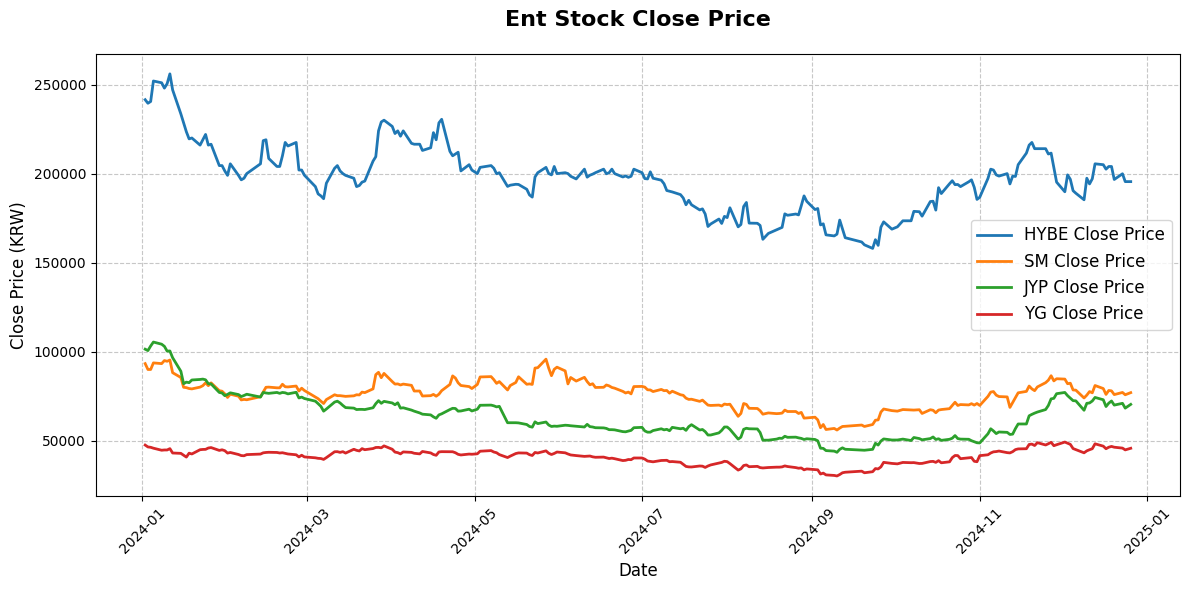

In [295]:
# ## 그래프 그리기

# import matplotlib.pyplot as plt

# # 그래프 크기 설정
# plt.figure(figsize=(12, 6))

# # 데이터 시각화
# plt.plot(hybe_2024.index, hybe_2024['hybe_close'], label='HYBE Close Price', linewidth=2)
# plt.plot(sm_2024.index, sm_2024['sm_close'], label='SM Close Price', linewidth=2)
# plt.plot(jyp_2024.index, jyp_2024['jyp_close'], label='JYP Close Price', linewidth=2)
# plt.plot(yg_2024.index, yg_2024['yg_close'], label='YG Close Price', linewidth=2)

# # 그래프 제목 및 라벨 추가
# plt.title('Ent Stock Close Price', fontsize=16, fontweight='bold', pad=20)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Close Price (KRW)', fontsize=12)

# # 격자선 추가
# plt.grid(True, linestyle='--', alpha=0.7)

# # 레이블 표시
# plt.legend(fontsize=12)

# # x축 날짜 간격 설정 (옵션)
# plt.xticks(rotation=45, fontsize=10)

# # 시각화 출력
# plt.tight_layout()  # 요소 간 간격 자동 조정
# plt.show()


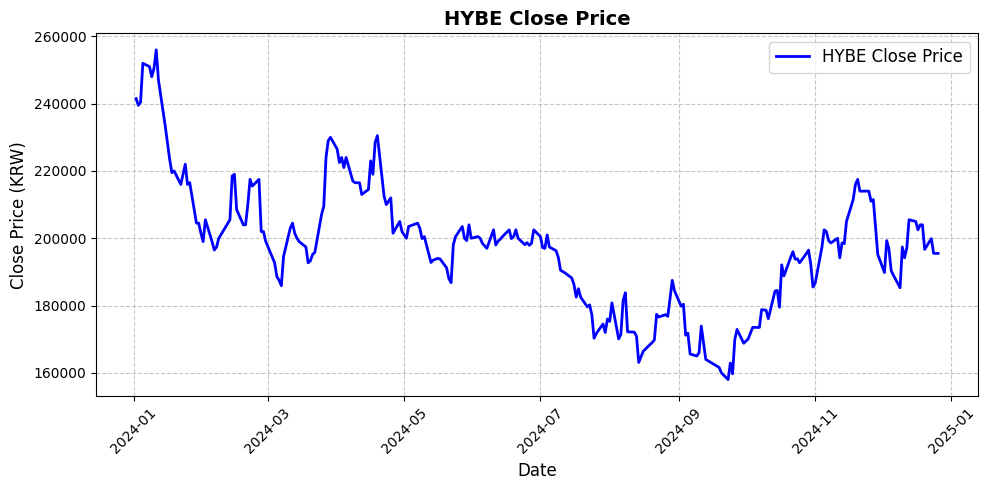

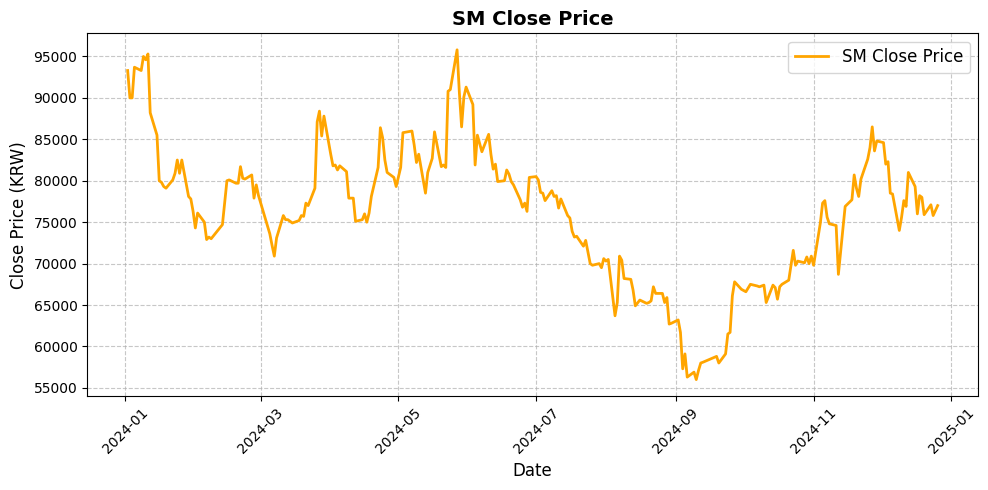

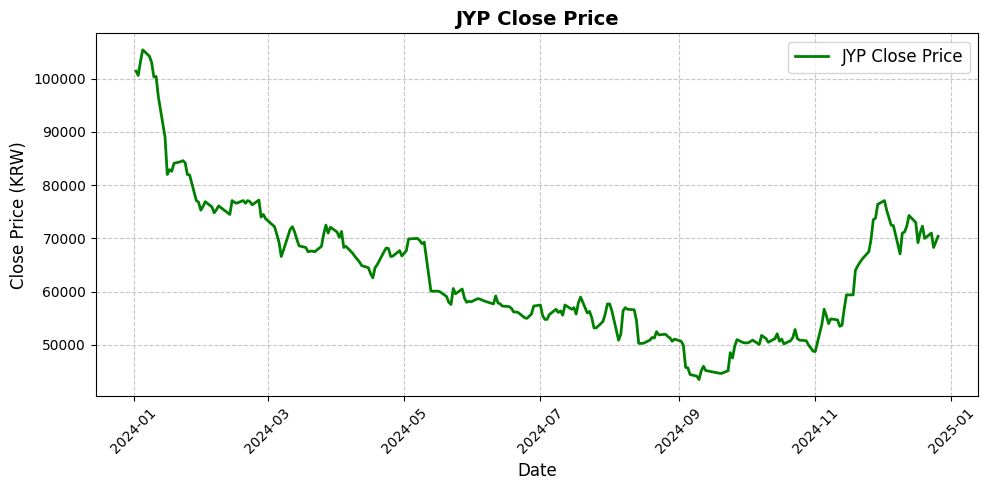

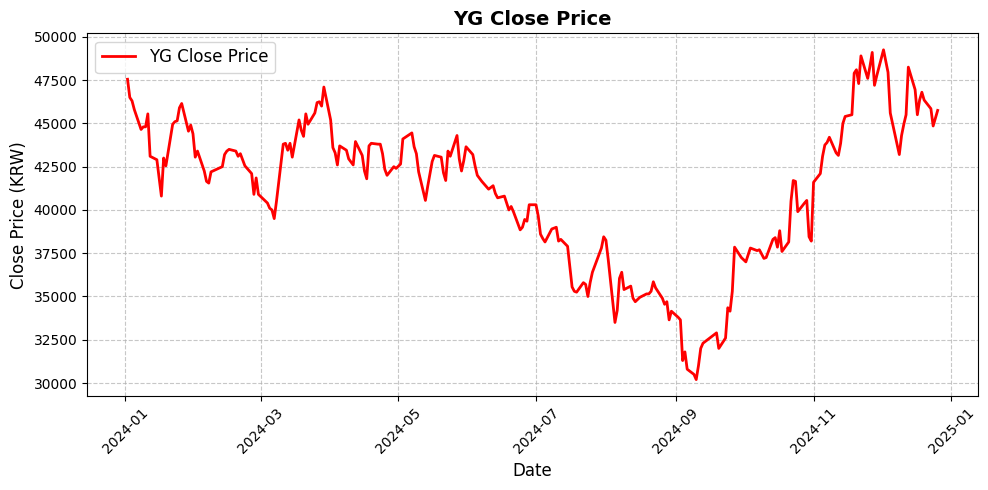

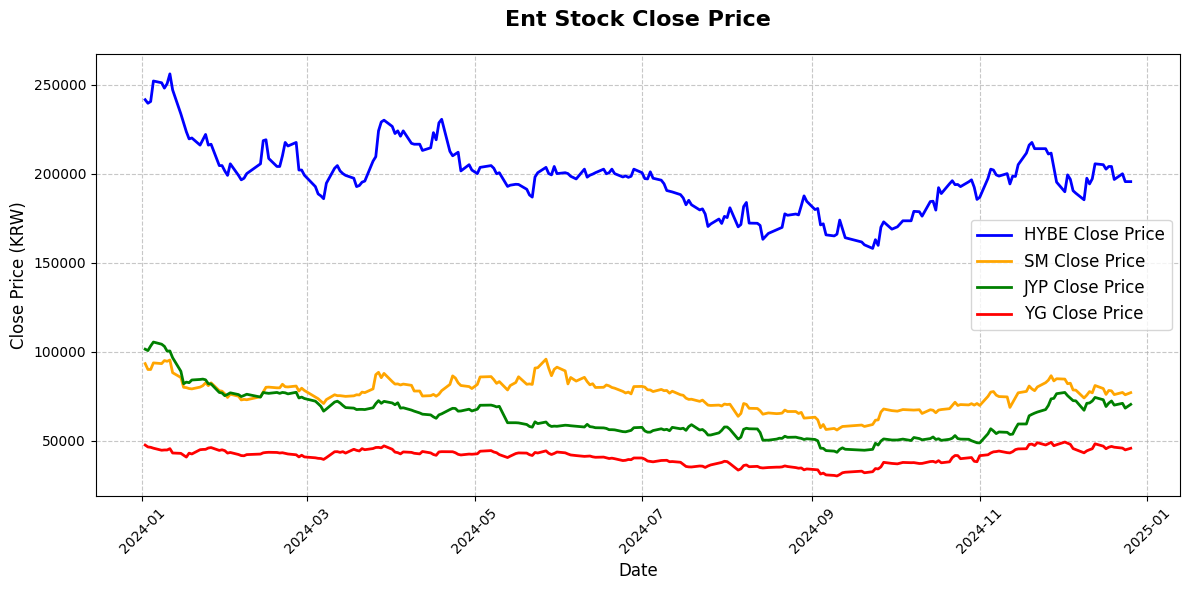

In [298]:
# # 개별 그래프 1: HYBE
# plt.figure(figsize=(10, 5))
# plt.plot(hybe_2024.index, hybe_2024['hybe_close'], label='HYBE Close Price', linewidth=2, color='blue')  # 색상: blue
# plt.title('HYBE Close Price', fontsize=14, fontweight='bold')
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Close Price (KRW)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.tight_layout()
# plt.savefig("hybe_close_price.png")  # 그래프 저장
# plt.show()

# # 개별 그래프 2: SM
# plt.figure(figsize=(10, 5))
# plt.plot(sm_2024.index, sm_2024['sm_close'], label='SM Close Price', linewidth=2, color='orange')  # 색상: orange
# plt.title('SM Close Price', fontsize=14, fontweight='bold')
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Close Price (KRW)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.tight_layout()
# plt.savefig("sm_close_price.png")  # 그래프 저장
# plt.show()

# # 개별 그래프 3: JYP
# plt.figure(figsize=(10, 5))
# plt.plot(jyp_2024.index, jyp_2024['jyp_close'], label='JYP Close Price', linewidth=2, color='green')  # 색상: green
# plt.title('JYP Close Price', fontsize=14, fontweight='bold')
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Close Price (KRW)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.tight_layout()
# plt.savefig("jyp_close_price.png")  # 그래프 저장
# plt.show()

# # 개별 그래프 4: YG
# plt.figure(figsize=(10, 5))
# plt.plot(yg_2024.index, yg_2024['yg_close'], label='YG Close Price', linewidth=2, color='red')  # 색상: red
# plt.title('YG Close Price', fontsize=14, fontweight='bold')
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Close Price (KRW)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.tight_layout()
# plt.savefig("yg_close_price.png")  # 그래프 저장
# plt.show()

# # 통합 그래프
# plt.figure(figsize=(12, 6))
# plt.plot(hybe_2024.index, hybe_2024['hybe_close'], label='HYBE Close Price', linewidth=2, color='blue')  # 색상: blue
# plt.plot(sm_2024.index, sm_2024['sm_close'], label='SM Close Price', linewidth=2, color='orange')  # 색상: orange
# plt.plot(jyp_2024.index, jyp_2024['jyp_close'], label='JYP Close Price', linewidth=2, color='green')  # 색상: green
# plt.plot(yg_2024.index, yg_2024['yg_close'], label='YG Close Price', linewidth=2, color='red')  # 색상: red
# plt.title('Ent Stock Close Price', fontsize=16, fontweight='bold', pad=20)
# plt.xlabel('Date', fontsize=12)
# plt.ylabel('Close Price (KRW)', fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.7)
# plt.legend(fontsize=12)
# plt.xticks(rotation=45, fontsize=10)
# plt.tight_layout()
# plt.savefig("ent_stock_close_price.png")  # 그래프 저장
# plt.show()


In [300]:
# for company, df in [("JYP", jyp_2024), ("SM", sm_2024), ("HYBE", hybe_2024), ("YG", yg_2024)]:
#     print(f"EDA for {company}")
#     print("Shape:", df.shape)
#     print("Columns:", df.columns.tolist())
#     print("Missing Values:", df.isnull().sum().to_dict())
#     print("Descriptive Statistics:")
#     print(df.describe(), "\n")


EDA for JYP
Shape: (242, 6)
Columns: ['jyp_open', 'jyp_high', 'jyp_low', 'jyp_close', 'jyp_volume', 'jyp_change']
Missing Values: {'jyp_open': 0, 'jyp_high': 0, 'jyp_low': 0, 'jyp_close': 0, 'jyp_volume': 0, 'jyp_change': 0}
Descriptive Statistics:
            jyp_open       jyp_high        jyp_low      jyp_close  \
count     242.000000     242.000000     242.000000     242.000000   
mean    63742.355372   64865.082645   62604.132231   63594.421488   
std     12797.702782   12919.093504   12426.622116   12577.325968   
min     43500.000000   44450.000000   43100.000000   43500.000000   
25%     54200.000000   55700.000000   53075.000000   54625.000000   
50%     60150.000000   60750.000000   59250.000000   59800.000000   
75%     71475.000000   72850.000000   69875.000000   71200.000000   
max    106000.000000  106000.000000  104000.000000  105400.000000   

         jyp_volume  jyp_change  
count  2.420000e+02  242.000000  
mean   5.656981e+05   -0.001115  
std    4.863008e+05    0.02